<a href="https://colab.research.google.com/github/themaverick97/Credit-Card-Fraud/blob/main/Credit_card_Fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
# Mounting the data file into the pandas DataFrame
df=pd.read_csv("/content/drive/MyDrive/data science/Projects/data_sets/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

## EDA(Exploratory Data Analysis)

In [5]:
df.isna().values.any()

False

In [6]:
df.isnull().values.any()

False

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b626da110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b626da650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b626d9e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b626dab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b626dae30>],
 'means': []}

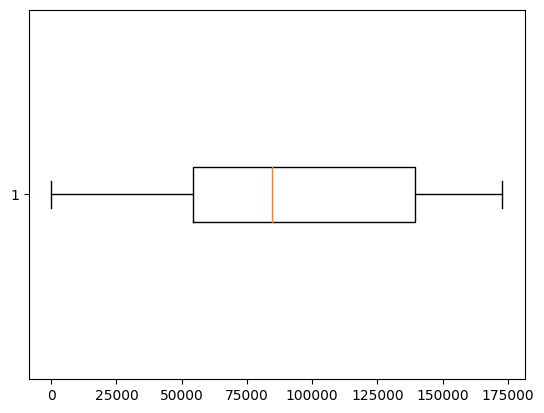

In [7]:
# checking for the outliers
plt.boxplot(df['Time'],vert=False)



(0.0, 1000.0)

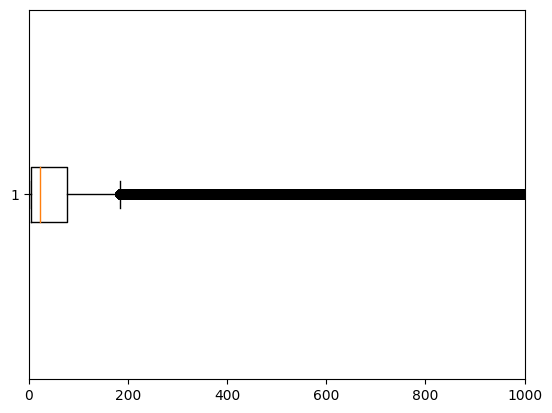

In [8]:
plt.boxplot(df['Amount'],vert=False)
plt.xlim(0,1000)

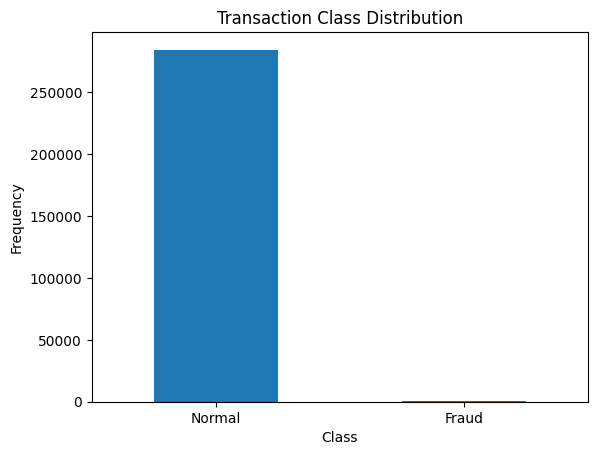

In [9]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels=("Normal","Fraud"))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [10]:
# The Percentage of the Fraud and Non Fraud in given dataset
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [11]:
# Get the Fraud and the normal dataset
fraud = df[df['Class']==1]
normal = df[df['Class']==0]


In [12]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [13]:
#We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

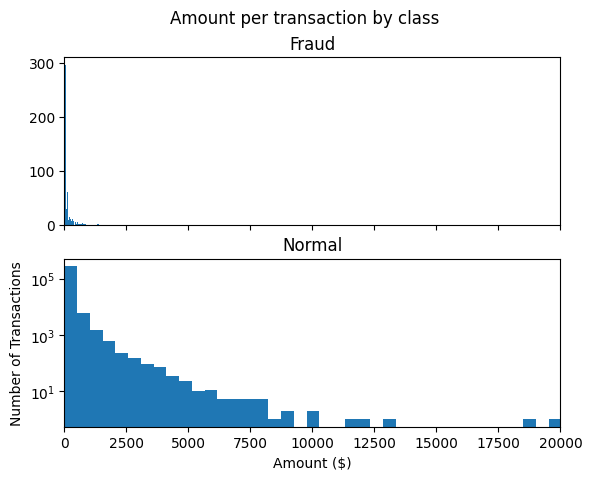

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

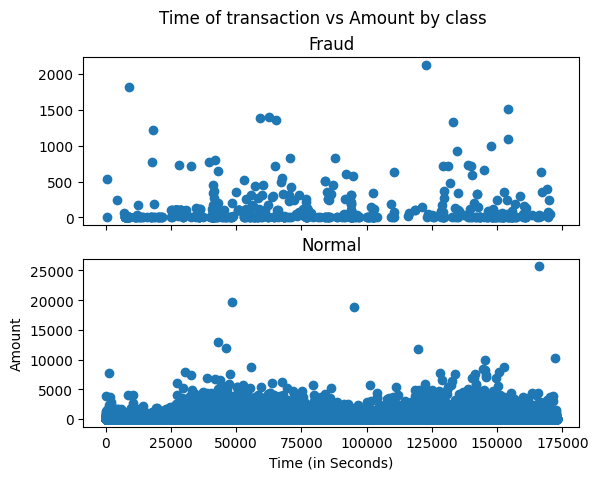

In [16]:
# We Will check Do fraudulent transactions occur more often during certain time frame .
#  Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

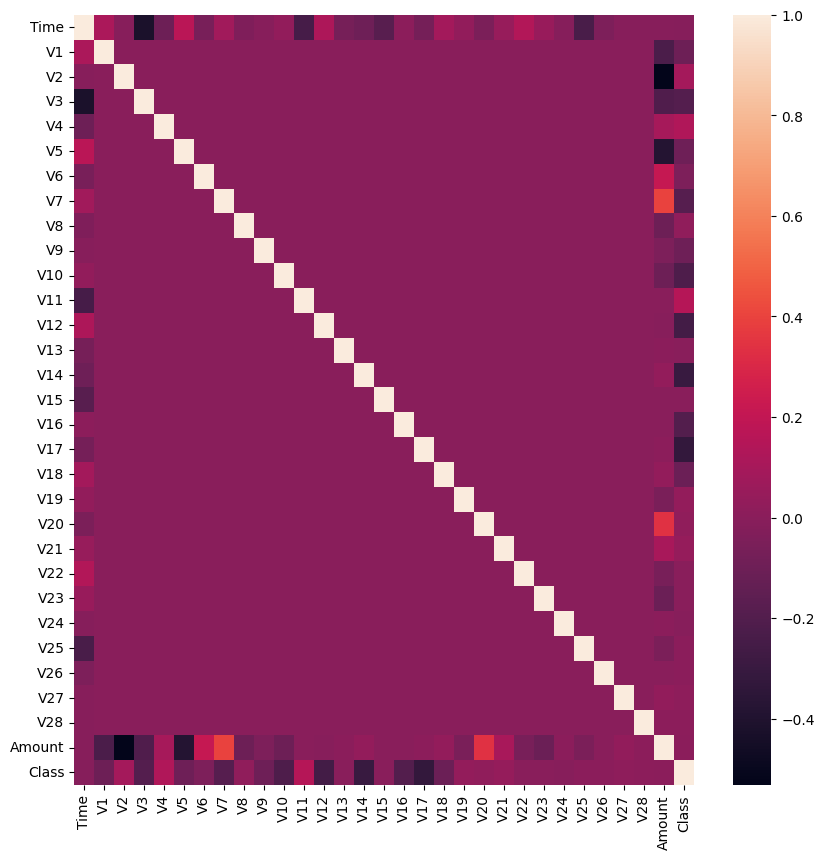

In [17]:
# Heatmap for the dataset
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=False)

In [18]:
# Take some sample of the data
df1= df.sample(frac = 0.1,random_state=1)
df1.shape


(28481, 31)

In [19]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [20]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [21]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [22]:
df2=df1
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [23]:
rs=RobustScaler()
df1['Amount']=rs.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['Time']=rs.fit_transform(df1['Time'].values.reshape(-1,1))

In [24]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.413675,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.281837,0
127467,-0.072670,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279232,0
137900,-0.025378,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294174,0
21513,-0.618173,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.087320,0
134700,-0.042449,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.295956,0


In [25]:
#Create independent and Dependent Features
X=df1.iloc[:,:-1]
y=df1['Class']
# Print the shapes of X & Y
print(X.shape)
print(y.shape)



(28481, 30)
(28481,)


In [26]:
y.value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [27]:
# Spliting the data into train,test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22784, 30)
(22784,)
(5697, 30)
(5697,)


In [29]:
# As we taken sample data(df1) from the main dataset which is imbalanced
# For the imbalanced dataset using the overfiting method called SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [30]:
# shapes of X and y
print(X_train_smote.shape,y.shape)
print(y_train_smote.value_counts())

(45492, 30) (28481,)
0    22746
1    22746
Name: Class, dtype: int64


In [31]:
# Model Training
rf_clf = RandomForestClassifier()

In [32]:
param_grid = {
    'n_estimators': [50,100,200],
    'criterion':['gini'],
    'min_samples_split': [2, 5],
    'max_features': [ 'sqrt', 'log2']
}

In [33]:
# Using the Grid Search to get the best hyperparmeters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')


In [34]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [35]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}


In [36]:
best_rf_model = grid_search.best_estimator_

In [37]:
y_pred_rf = best_rf_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9994734070563455


In [39]:
cr=classification_report(y_test,y_pred_rf)
print(cr)
n_errors=(y_pred_rf !=y_test).sum()
print("{}: {}".format(rf_clf,n_errors))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.90      0.82      0.86        11

    accuracy                           1.00      5697
   macro avg       0.95      0.91      0.93      5697
weighted avg       1.00      1.00      1.00      5697

RandomForestClassifier(): 3


In [40]:
# Using the LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred_lr=model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9985957521502545


In [43]:
cr=classification_report(y_test,y_pred_lr)
print(cr)
n_errors=(y_pred_lr !=y_test).sum()
print("{}: {}".format(model,n_errors))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.71      0.45      0.56        11

    accuracy                           1.00      5697
   macro avg       0.86      0.73      0.78      5697
weighted avg       1.00      1.00      1.00      5697

LogisticRegression(): 8


In [44]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
print("The the area under the curve is :",roc_auc)


The the area under the curve is : 0.7270968567134589


In [45]:
# the outlier detection methods
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [46]:
X=df2.iloc[:,:-1]
y=df2['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_test)
        scores_prediction = clf.negative_outlier_factor_
    else:
        r=clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_test)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (28481) is greater than the total number of samples (22784). max_samples will be set to n_samples for estimation.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 9
Accuracy Score :
0.9984202211690363
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.33      0.29      0.31         7

    accuracy                           1.00      5697
   macro avg       0.67      0.64      0.65      5697
weighted avg       1.00      1.00      1.00      5697

Local Outlier Factor: 11
Accuracy Score :
0.9980691592066
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.30      0.43      0.35         7

    accuracy                           1.00      5697
   macro avg       0.65      0.71      0.68      5697
weighted avg       1.00      1.00      1.00      5697



In [122]:
# Make a prediction on Fraud or Valid
def pred(data):
    data = np.asarray(data).reshape(1,-1)
    predd = model.predict(data)
    if predd == 0:
        print("it's a Valid Transcation")
    else:
        print("it's a fraudulent Transcation")

In [123]:
# It is Fraud Transcation
pred([4462,-2.30334956758553,1.759247460267,-0.359744743330052,2.33024305053917,-0.821628328375422,-0.0757875706194599,0.562319782266954,-0.399146578487216,-0.238253367661746,-1.52541162656194,2.03291215755072,-6.56012429505962,0.0229373234890961,-1.47010153611197,-0.698826068579047,-2.28219382856251,-4.78183085597533,-2.61566494476124,-1.33444106667307,-0.430021867171611,-0.294166317554753,-0.932391057274991,0.172726295799422,-0.0873295379700724,-0.156114264651172,-0.542627889040196,0.0395659889264757,-0.153028796529788,239.93])

it's a fraudulent Transcation


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [124]:
# It is Valid Transcation
pred([13,-0.436905071360625,0.918966212909322,0.92459077438817,-0.727219053596792,0.915678718106307,-0.127867352079254,0.707641607333935,0.0879623554672504,-0.66527135413364,-0.737979823596458,0.32409781346169,0.277192107214981,0.252624256310781,-0.291896460370468,-0.184520169327133,1.14317370716197,-0.92870926272403,0.680469592634687,0.0254364616880793,-0.0470212823165035,-0.194795823794671,-0.672637997017793,-0.156857514491897,-0.888386320943716,-0.342413218776576,-0.049026728633951,0.0796923991551505,0.131023789452311,0.89])

it's a Valid Transcation


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
